In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

In [2]:
loan=pd.read_csv('CleanedFile.csv',low_memory=False,encoding='ISO-8859-1',skipinitialspace=True)
loanfreature_df=loan

In [3]:
reject=pd.read_csv('RejectLoan.csv',low_memory=False,encoding='ISO-8859-1',skipinitialspace=True)
rejectData_df=reject

In [4]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_month,issue_year,last_fico_range,last_meanfico
0,32000,32000,32000,36,13.99,1093.53,C,C3,10,MORTGAGE,...,0.0,0.0,283160.0,66642.0,17200.0,50960.0,Jun,2016,710.0-714.0,712.0
1,35000,35000,35000,36,23.99,1372.97,E,E2,10,RENT,...,0.0,0.0,156126.0,84853.0,18800.0,117926.0,Jun,2016,670.0-674.0,672.0
2,24000,24000,24000,60,13.99,558.32,C,C3,10,RENT,...,0.0,0.0,81496.0,45998.0,28100.0,48696.0,Jun,2016,695.0-699.0,697.0
3,21000,21000,21000,36,13.49,712.54,C,C2,10,MORTGAGE,...,1.0,0.0,55612.0,34503.0,20900.0,31412.0,Jun,2016,695.0-699.0,697.0
4,11000,11000,11000,36,9.49,352.32,B,B2,10,RENT,...,0.0,0.0,23700.0,15103.0,13500.0,6000.0,Jun,2016,680.0-684.0,682.0


In [5]:
reject.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,30000,2015-01-01,debt_consolidation,681,35.65,CA,1,0
1,5000,2015-01-01,debt_consolidation,648,10.62,CA,1,0
2,10000,2015-01-01,Debt consolidation,721,10.02,TX,7,0
3,10000,2015-01-01,major_purchase,659,19.05,AZ,1,0
4,5000,2015-01-01,debt_consolidation,501,10.73,IN,1,0


In [6]:
summ_df = pd.DataFrame()
grouped = loan.groupby('issue_year')
summ_df = summ_df.append(grouped.aggregate(np.mean))
summ_df['loancount']=loan['loan_amnt'].groupby(loan['issue_year']).count()
summ_df['year']=summ_df.index
summ_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_meanfico,loancount,year
issue_year,,,,,,,,,,,,,,,,,,,,,
2007,8254.519071,7946.185738,1325.519071,36.000000,11.825108,264.842090,3.109453,64743.955224,10.709519,0.288557,...,0.000000,0.029851,0.001658,0.000000,0.000000,0.000000,0.000000,638.005804,603,2007
2008,8825.428333,8347.273297,3179.903051,36.000000,12.061964,278.829465,4.326786,65241.740493,13.204605,0.216047,...,0.000000,0.054743,0.000000,0.000000,0.000000,0.000000,0.000000,661.636858,2393,2008
2009,9833.033516,9811.541375,8668.199773,36.000000,12.437247,329.842043,4.238023,69192.281954,12.466548,0.133687,...,0.000000,0.032380,0.000000,0.000000,0.000000,0.000000,0.000000,685.001041,5281,2009
2010,10528.240408,10078.262343,9817.588418,42.472362,11.985268,303.322235,4.884342,69512.984765,13.095154,0.147324,...,0.000000,0.045386,0.000000,0.000000,0.000000,0.000000,0.000000,683.213329,12537,2010
2011,12047.503568,11848.609640,11694.905161,44.419502,12.223365,338.436839,5.209060,69456.000506,13.846331,0.148980,...,0.000000,0.044795,0.000000,0.000000,0.000000,0.000000,0.000000,684.254500,21721,2011
2012,13461.709015,13452.932055,13429.753893,40.450840,13.637920,421.866695,5.638353,69720.227481,16.661354,0.201660,...,45.325561,0.023029,0.000824,75094.966253,34510.021867,16855.351228,15896.168456,675.293918,53367,2012
2013,14707.413733,14707.371267,14699.791847,42.122569,14.532012,452.393052,6.011334,73228.081364,17.218046,0.254655,...,53.230450,0.109232,0.019271,167286.011371,43814.448633,20452.528884,34633.862648,677.533046,134814,2013
2014,14870.156793,14870.156793,14865.334169,43.441427,13.770047,442.468144,5.877995,74854.143212,18.040770,0.344512,...,50.219112,0.134873,0.055757,170248.976930,48389.432888,20031.414966,39883.390920,674.144972,235629,2014
2015,15240.285862,15240.285862,15234.156411,43.860763,12.600242,441.857881,5.766651,76965.604424,19.195989,0.347397,...,47.048673,0.133188,0.064556,173407.010240,52221.989480,21958.208958,43478.645683,680.375446,421095,2015


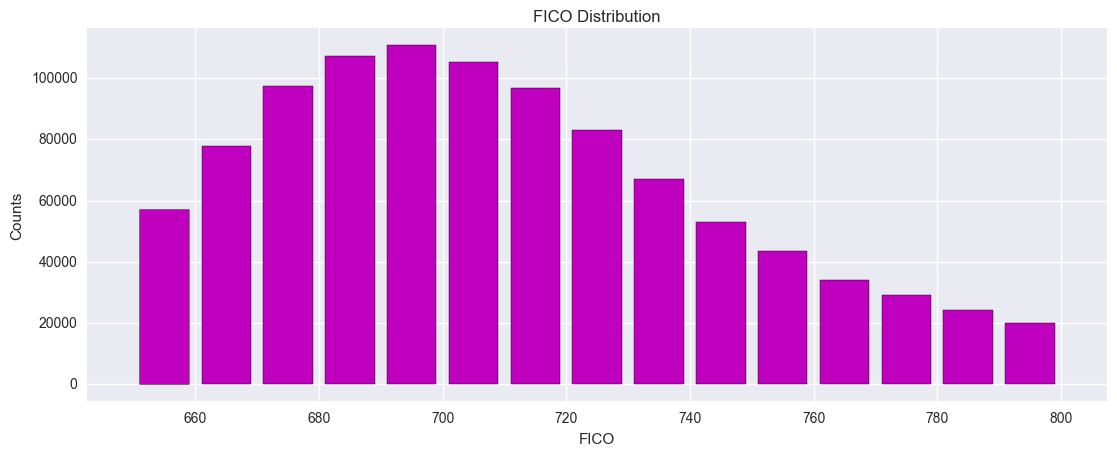

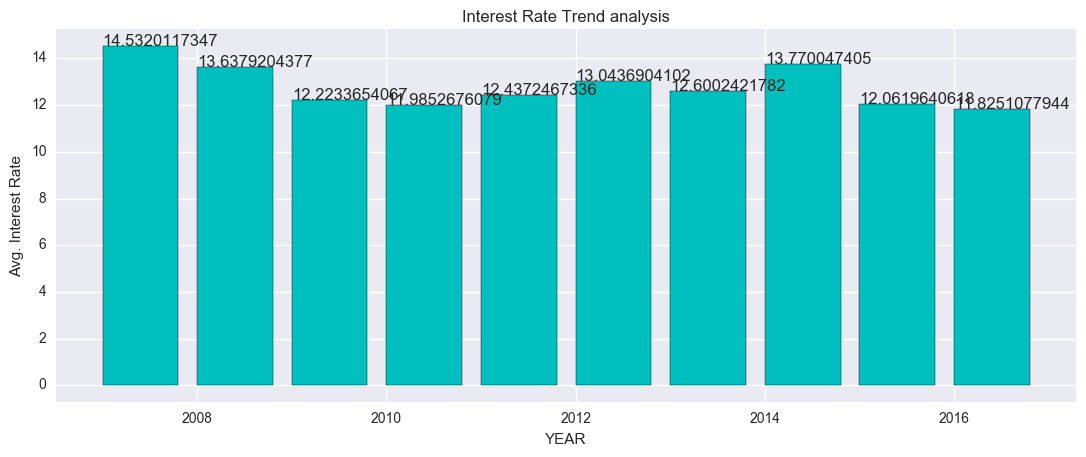

In [7]:
from __future__ import unicode_literals
import math

def plot_time_trends_1():
    year=loan['issue_year'].drop_duplicates()
    fico=loan['last_meanfico']
    dti=summ_df['dti']
    
    plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='b')
    
    ax1=plt.subplot(211)
    plt.plot(['07','08','09','10','11','12','13','14','15','16'],dti,'r--')
    plt.xlabel('YEAR in 2000s')
    plt.ylabel('Avg. Debt to Income %')
    plt.legend(['DTI'])
    plt.grid(True)
    
    plt.title('Debt to Income Time Series')
  
    ax2=plt.subplot(212)
    bins=[650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800]
    plt.hist(fico, bins=bins, histtype='bar', rwidth=0.8 ,color='m')
    plt.xlabel('FICO')
    plt.ylabel('Counts')
    plt.title('FICO Distribution')
        
    ax2.margins(0.05)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    
def plot_time_trends_2():
    int_rt=summ_df['int_rate']
    year=loan['issue_year'].drop_duplicates()
    dti=summ_df['dti']

    plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='b')


    ax4=plt.subplot(212)
    plt.bar(year,int_rt,color='c')
    plt.xlabel('YEAR')
    plt.ylabel('Avg. Interest Rate')
    plt.title('Interest Rate Trend analysis')
    for a,b in zip(year, int_rt): 
        plt.text(a, b, str(b))
        
    ax4.margins(0.05)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()  
   
    
plot_time_trends_1()
plot_time_trends_2()

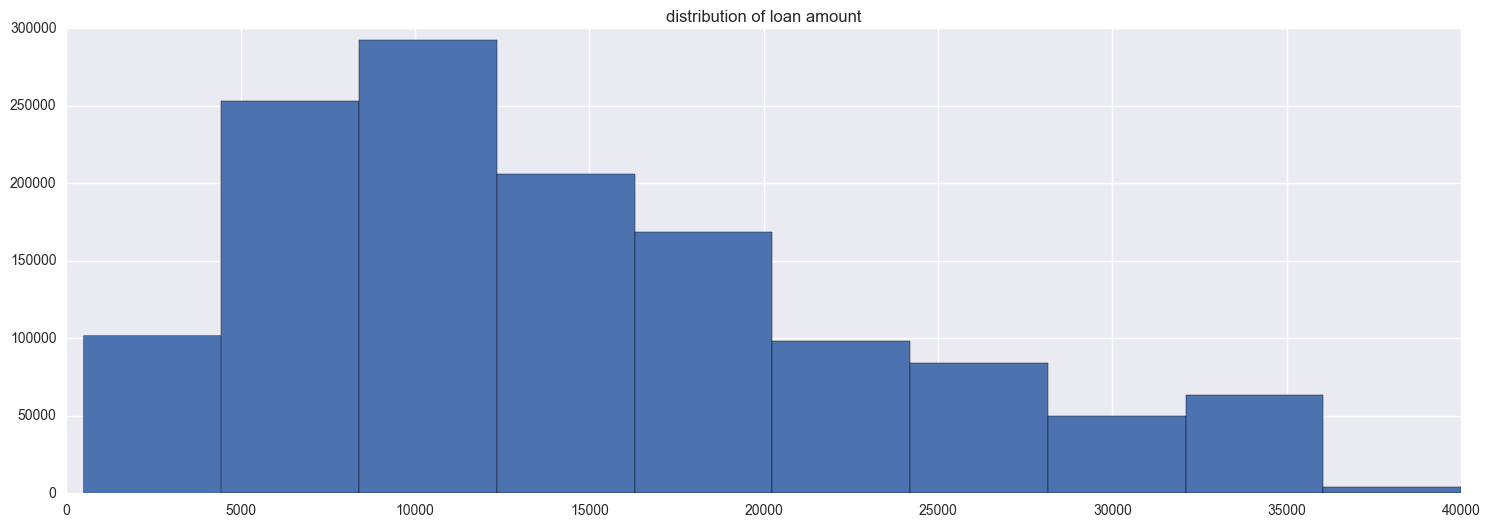

In [8]:
plt.rc("figure", figsize=(18, 6))
loan["loan_amnt"].hist()
plt.title("distribution of loan amount")

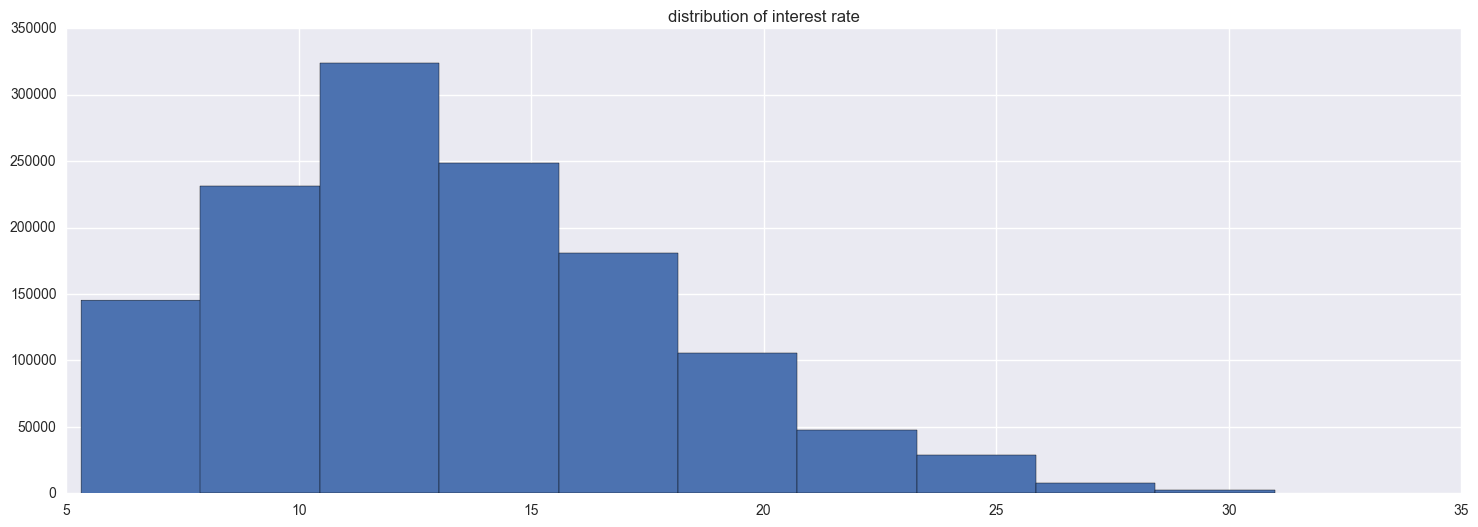

In [9]:
plt.rc("figure", figsize=(18, 6))
loan["int_rate"].hist()
plt.title("distribution of interest rate")

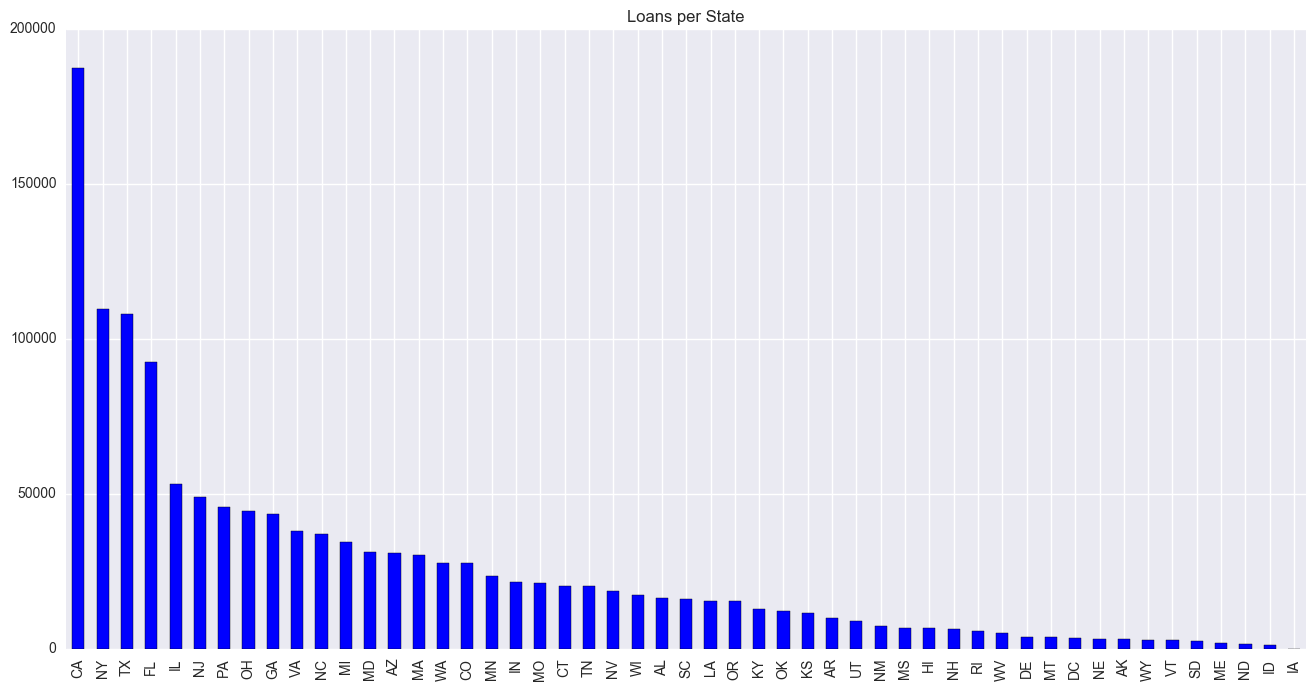

In [10]:
state_count = loan.addr_state.value_counts()
state_count.plot(kind = 'bar',figsize=(16,8),color='blue', title = 'Loans per State')

In [11]:
loanpurp = pd.DataFrame()
loanpurp = loan.groupby(['term','purpose']).size().sort_values()
loanp = loanpurp.unstack()
loanp

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
term,,,,,,,,,,,,,,
36,11024,219606,529932,406,59249,4138,21295,11549,7534,58487,738,11365,7389,1952
60,2653,78197,243220,17,23767,1571,6388,2432,1110,12878,141,3803,609,397


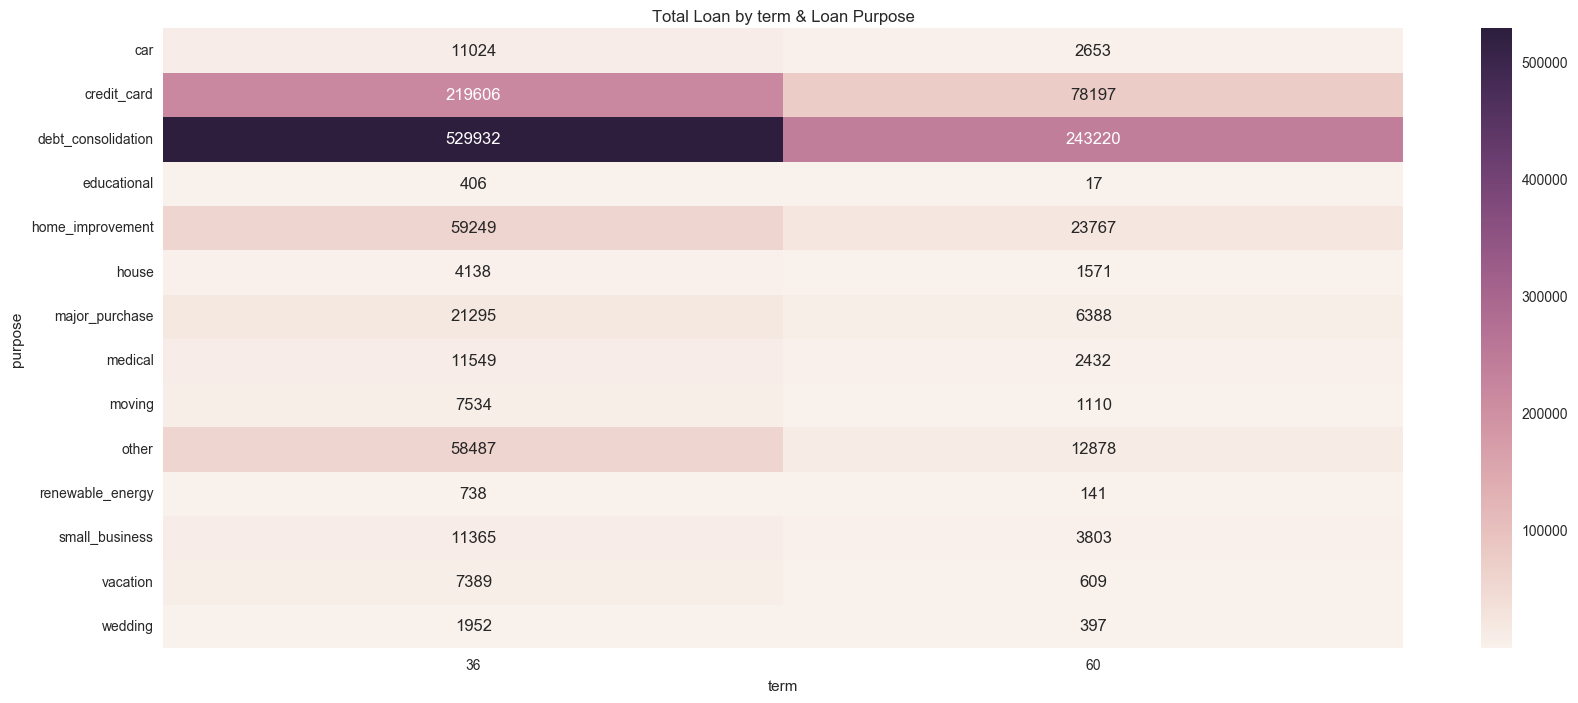

In [12]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(20, 8))
plt.title('Total Loan by term & Loan Purpose')
ax =sns.heatmap(loanp.T,mask= loanp.T.isnull(),annot=True,fmt='g');
ax

purpose
car                    13677
credit_card           297803
debt_consolidation    773152
educational              423
home_improvement       83016
house                   5709
major_purchase         27683
medical                13981
moving                  8644
other                  71365
renewable_energy         879
small_business         15168
vacation                7998
wedding                 2349
Name: purpose, dtype: int64


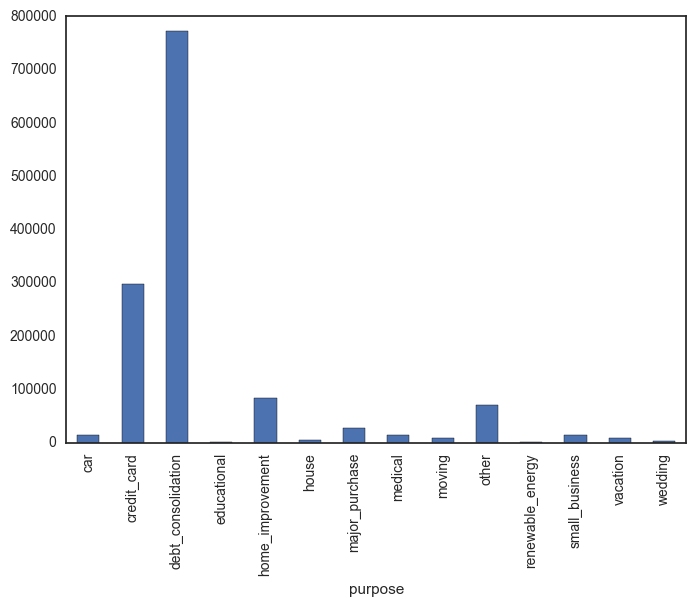

In [13]:
# What is the distribution of loans by purpose?
loans_by_purpose = loan.groupby('purpose')
print(loans_by_purpose['purpose'].count())
loans_by_purpose['purpose'].count().plot(kind='bar')

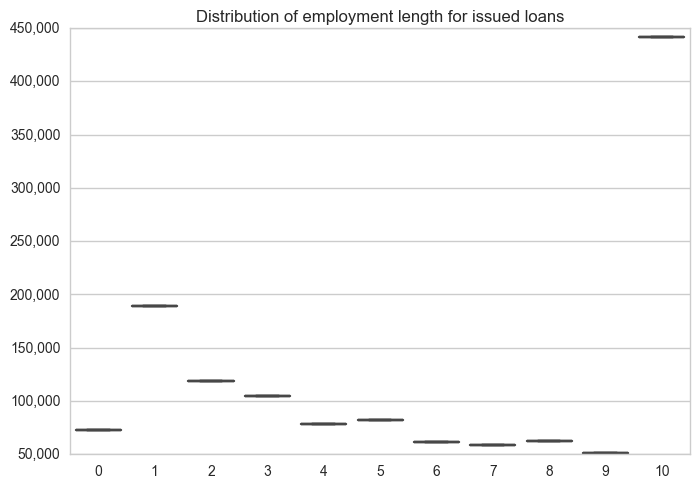

In [14]:
s = pd.value_counts(loan['emp_length']).to_frame().reset_index()
s.columns = ['type', 'count']
def emp_dur_graph(graph_title):

    sns.set(style="whitegrid", color_codes=True)
    ax = sns.boxplot(y = "count", x = 'type', data=s)
    ax.set(xlabel = '', ylabel = '', title = graph_title)
    ax.get_yaxis().set_major_formatter(
    m.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

In [ ]:
#Total interest rate ByYear 
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = (30.0, 10.0)

sns.set_style("darkgrid")

year=np.sort(loan["issue_year"].unique().tolist())

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((4,2), (0,0), colspan=3)
    order=loan["purpose"].drop_duplicates().tolist()
    ax1 = sns.barplot(x='purpose',y="int_rate",data = loan, order = order)
    ax1 = plt.xticks(size = 10,rotation = 80)
    ax1 = plt.title("'purpose' v/s 'interest rate'")    
    
    ax2 = plt.subplot2grid((4,2), (1, 0))
    ax2 = plt.rc("figure", figsize=(10, 8))
    ax2 = sns.barplot(x='term',y="int_rate",data = loan)
    ax2 = plt.title("'term' v/s 'interest rate'")    
    
    ax3 = plt.subplot2grid((4,2), (1, 1))
    ax3 = plt.rc("figure", figsize=(6, 4))
    ax3 = sns.barplot(x='home_ownership',y="int_rate",data = loan)
    ax3 = plt.title("'home_ownership' v/s 'int_rate'")
    
    ax4 = plt.subplot2grid((4,2), (2, 0))
    ax4 = plt.rc("figure", figsize=(10, 8))
    ax4 = sns.barplot(x='emp_length',y="int_rate",data = loan)
    ax4 = plt.title("'employee length' v/s 'interest rate'")
    ax4 = plt.xticks(size = 10,rotation = 80)
    
    ax5 = plt.subplot2grid((4,2), (2, 1))
    ax5 = plt.rc("figure", figsize=(10, 8))
    order = np.sort(loan["issue_year"].unique().tolist())
    ax5 = sns.barplot(x='issue_year',y="int_rate",data = loan, order = order)
    ax5 = plt.title("'issue_year' v/s 'interest rate'")
    ax5 = plt.xticks(size = 10,rotation = 80)  
    
    ax6 = plt.subplot2grid((4,2), (3, 0))
    ax6 = plt.rc("figure", figsize=(10, 8))
    ax6 = sns.barplot(x='application_type',y="int_rate",data = loan)
    ax6 = plt.title("'application type' v/s 'interest rate'")  

    
    
    
plt.tight_layout(2)
plt.show()

term
36    944664
60    377183
Name: term, dtype: int64


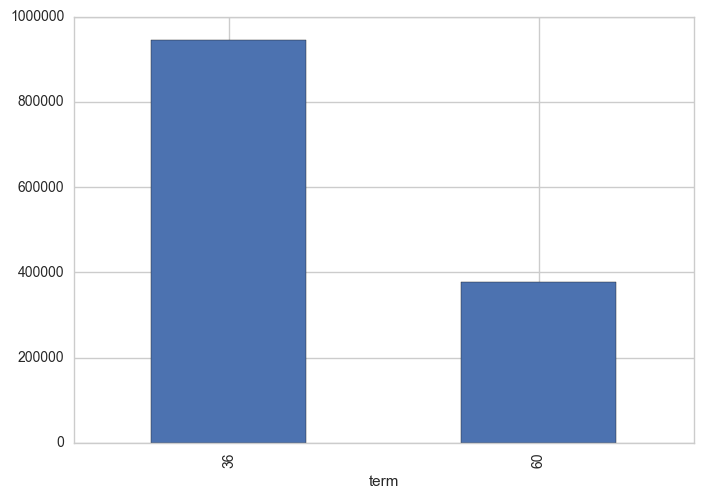

In [15]:
# What is the distribution of loans by term?
loans_by_term = loan.groupby('term')
print(loans_by_term['term'].count())
loans_by_term['term'].count().plot(kind='bar')

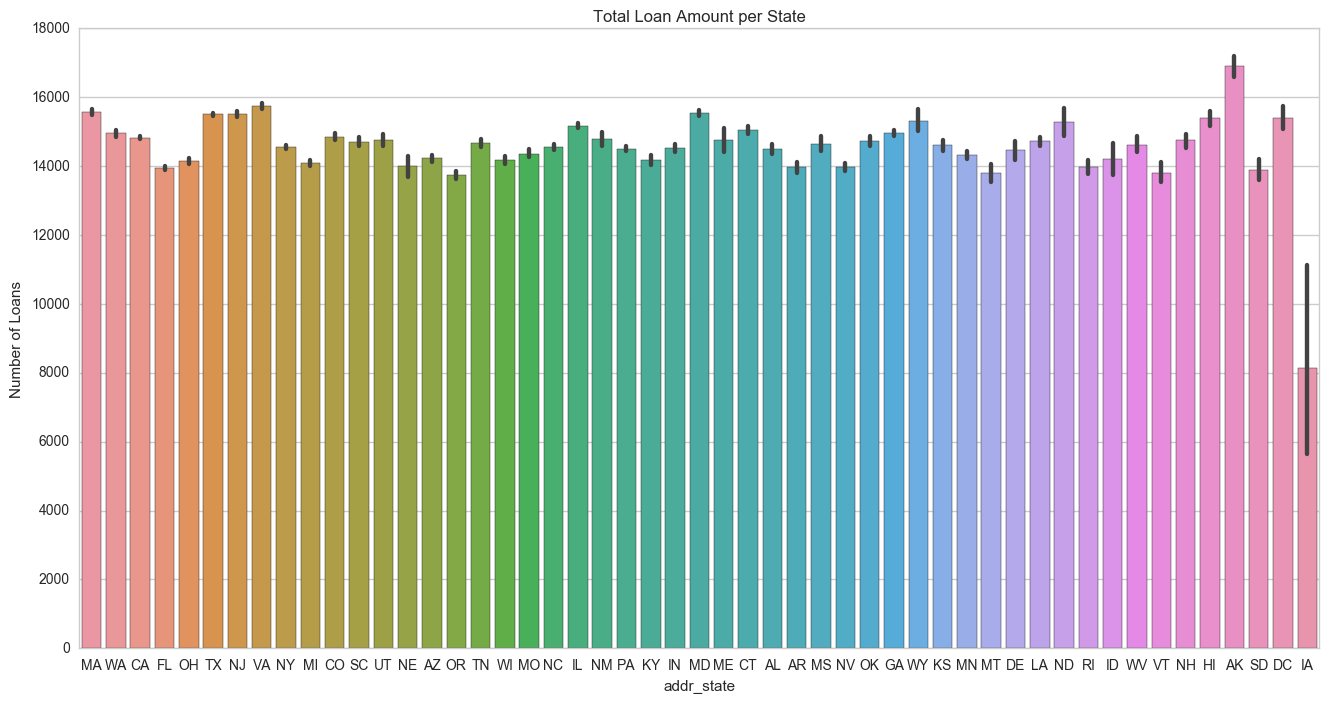

In [16]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='addr_state', y='loan_amnt', data=loan)
ax.set(ylabel = 'Number of Loans', title = 'Total Loan Amount per State')
plt.show()

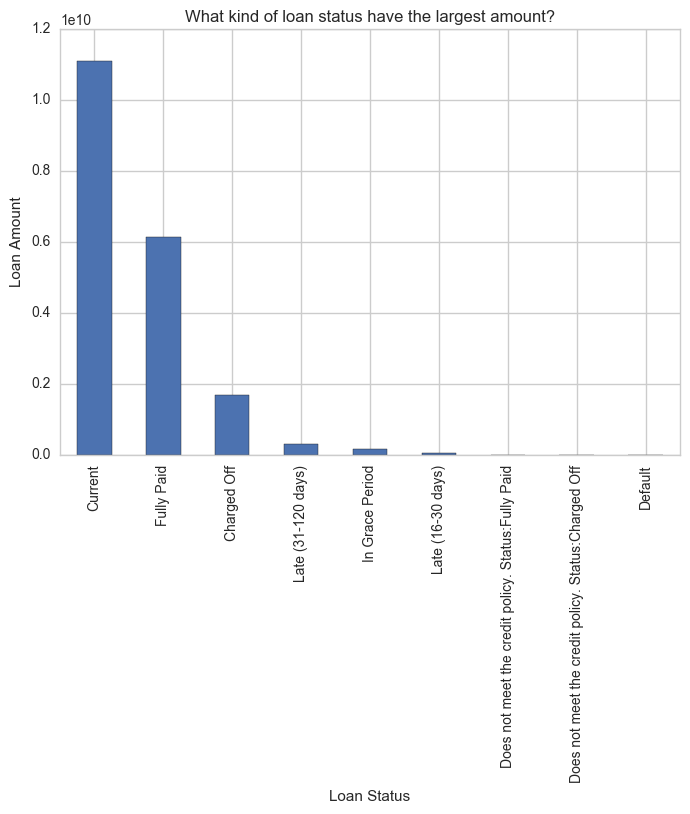

In [17]:
loan.groupby('loan_status')['loan_amnt'].sum().sort_values(ascending=0).plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('What kind of loan status have the largest amount?')

In [18]:
rejectData_df['issue_d'] = rejectData_df['Application Date'].str.split("-")
rejectData_df['Issue_year']=rejectData_df['issue_d'].str[0]
reject_cols_to_keep=['Amount Requested', 'Employment Length', 'Risk_Score', 'Debt-To-Income Ratio','Issue_year']
rejectData_df=rejectData_df[reject_cols_to_keep]
rejectData_df['Approval_status']=0
rejectData_df.head()

C:\Users\vishakha\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Amount Requested,Employment Length,Risk_Score,Debt-To-Income Ratio,Issue_year,Approval_status
0,30000,1,681,35.65,2015,0
1,5000,1,648,10.62,2015,0
2,10000,7,721,10.02,2015,0
3,10000,1,659,19.05,2015,0
4,5000,1,501,10.73,2015,0


In [19]:
cols_to_keep=['loan_amnt', 'emp_length', 'last_meanfico', 'dti','issue_year']
loanfreature_df=loanfreature_df[cols_to_keep]
loanfreature_df['Approval_status']=1
loanfreature_df.columns=['Amount Requested', 'Employment Length', 'Risk_Score', 'Debt-To-Income Ratio','Issue_year','Approval_status']
loanfreature_df.head()

C:\Users\vishakha\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Amount Requested,Employment Length,Risk_Score,Debt-To-Income Ratio,Issue_year,Approval_status
0,32000,10,712.0,17.30,2016,1
1,35000,10,672.0,15.61,2016,1
2,24000,10,697.0,19.30,2016,1
3,21000,10,697.0,25.00,2016,1
4,11000,10,682.0,11.90,2016,1


In [20]:
x_train1=loanfreature_df
x_test1=rejectData_df
frames=[x_train1,x_test1]
result = pd.concat(frames)
result.head()

,Amount Requested,Employment Length,Risk_Score,Debt-To-Income Ratio,Issue_year,Approval_status
0,32000,10,712.0,17.30,2016,1
1,35000,10,672.0,15.61,2016,1
2,24000,10,697.0,19.30,2016,1
3,21000,10,697.0,25.00,2016,1
4,11000,10,682.0,11.90,2016,1


In [ ]:
# Analysis of Yearly approved and rejected loans
y=result
y=pd.DataFrame({'count' : y.groupby( ['Issue_year','Approval_status'] ).size()}).reset_index()
y

In [ ]:
# Barplot to show yearwise approval status
g = sns.factorplot(x="Issue_year", y="count", hue="Approval_status", data=y,
                   size=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Count")

In [ ]:
# Analysis of approval status
X=result.groupby(['Approval_status']).count()

X['status']=X.index
# print(X)

# Barplot to show categorization of approval status
g=sns.factorplot(x="status",y='Issue_year',data=X,size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Count")

In [ ]:
# Plot to show Risk_Score analysis as per the approval status
z=result
g = sns.FacetGrid(z,col="Approval_status",col_order=[0,1])
g = g.map(plt.hist, "Risk_Score",color="m")